In [1]:
#importing the required libraries and metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [2]:
#accesing the dataset from the file in the device
a=pd.read_csv('C:/Users/hp/Downloads/Github/Repository/abalone.csv')
ab=pd.DataFrame(a)

In [3]:
#check for structure of the data table
ab.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
#Lets check whether there are null values or not
ab.isnull().sum()
#so there is no null values in the dataset

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [5]:
#conversion of categorical column in binary form
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ab['Sex']=le.fit_transform(ab['Sex'])

In [6]:
#check for the datatype of various columns
ab.dtypes

Sex                 int32
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

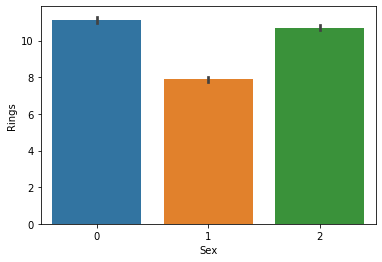

In [10]:
#plotting barplot to see the ratio of variation on sex wrt to rings
sns.barplot(x='Sex',y='Rings',data=ab)

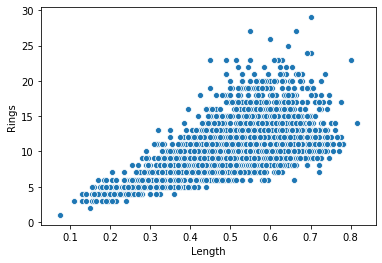

In [12]:
#plotting scatterplot b/w length and rings
sns.scatterplot(x='Length',y='Rings',data=ab)

In [13]:
#check for correlation
abcor=ab.corr()
abcor

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


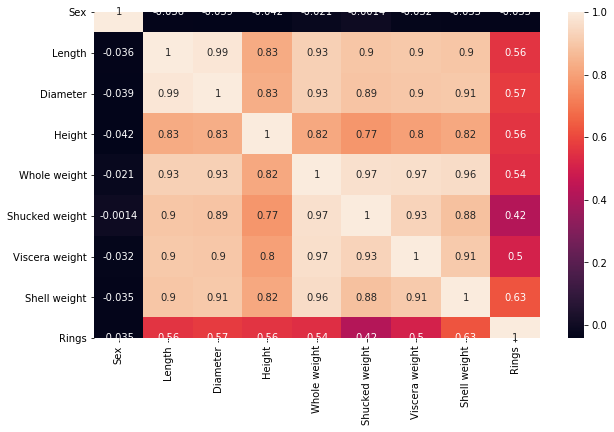

In [14]:
#plotting the correlation using heatmap
plt.figure(figsize=(10,6))
sns.heatmap(abcor,annot=True)

Sex                  AxesSubplot(0.125,0.657941;0.227941x0.222059)
Length            AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Diameter          AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Height               AxesSubplot(0.125,0.391471;0.227941x0.222059)
Whole weight      AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Shucked weight    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Viscera weight          AxesSubplot(0.125,0.125;0.227941x0.222059)
Shell weight         AxesSubplot(0.398529,0.125;0.227941x0.222059)
Rings                AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

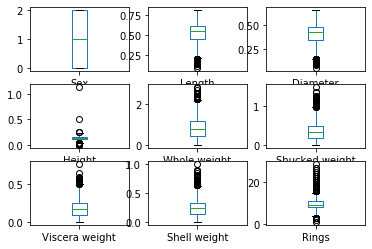

In [65]:
#boxplot for each columns
ab.plot(kind='box',subplots=True,layout=(3,3))

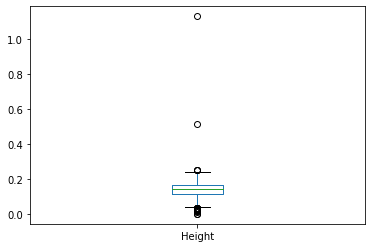

In [15]:
#from the above,we find out height column has maximum outliers
#lets plot it seperately
ab['Height'].plot.box()

In [16]:
#importing zscore to handle outliers
from scipy.stats import zscore
z=np.abs(zscore(ab))

In [17]:
#getting a new dataset after applying zscore to original datset
ab_new=ab[(z<3).all(axis=1)]

In [18]:
#check for the shape of dataset
ab.shape

(4177, 9)

In [20]:
#shape of dataset after applying zscore
ab_new.shape

(4027, 9)

In [19]:
#from above two executions,it is clear that there is more than 100 outliers which is removed
#So we take new dataset as our primary
ab=ab_new

In [21]:
#Lets describe the data to get statistical glance
ab.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000
mean,1.051403,0.520987,0.405300,0.138002,0.802805,0.349099,0.175718,0.230676,9.738763
std,0.818071,0.115910,0.095903,0.036878,0.456192,0.206406,0.103350,0.127939,2.864691
min,0.000000,0.165000,0.115000,0.015000,0.014500,0.005500,0.000500,0.005000,3.000000
25%,0.000000,0.450000,0.345000,0.115000,0.438000,0.182000,0.091750,0.127750,8.000000
50%,1.000000,0.540000,0.420000,0.140000,0.783000,0.329500,0.167000,0.225000,9.000000
75%,2.000000,0.610000,0.480000,0.165000,1.131250,0.493500,0.246500,0.320000,11.000000
max,2.000000,0.760000,0.605000,0.250000,2.238500,1.017000,0.492500,0.655000,19.000000


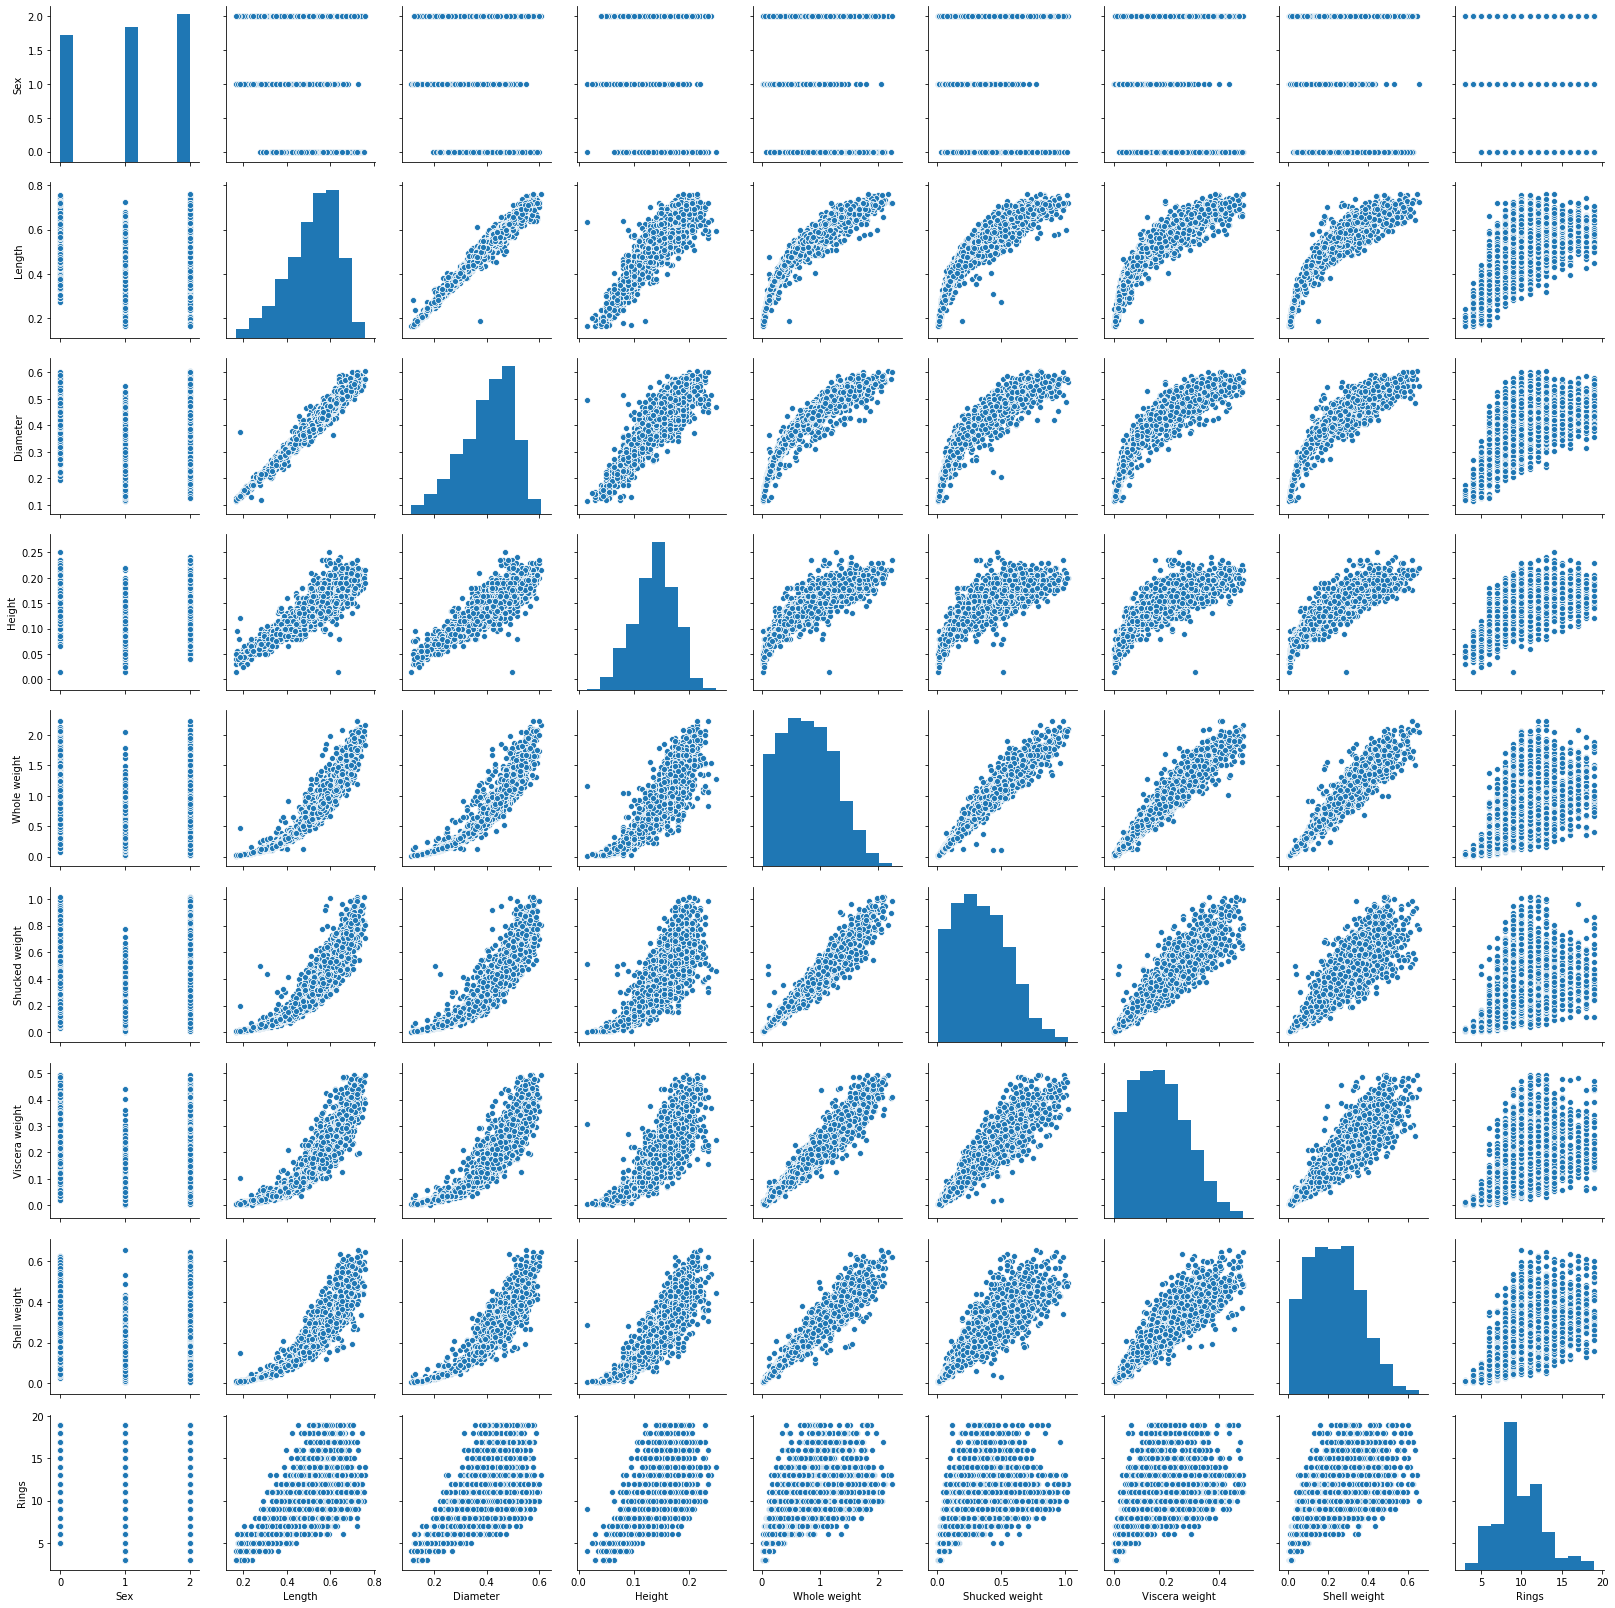

In [22]:
#plotting the pairplot of whole data columns
sns.pairplot(ab)

In [25]:
#seperating the input and output variables
x=ab.drop(['Rings'],axis=1)
y=ab['Rings']

In [24]:
#defining a function to evaluate random_state
def random(alg):
    r_state=0
    for r_score in range(43,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=r_score)
        alg.fit(x_train,y_train)
        pred=alg.predict(x_test)
        r2scr=r2_score(y_test,pred)
        if r2scr > r_state:
            r_state=r2scr
            final_r=r_score
    print(r2scr,'at',final_r)

In [28]:
#we need to suppress the warnings arises in detrmining random state
import warnings
warnings.filterwarnings('ignore')

In [46]:
#defining a function for algorithm operations and metrics evaluation
def model(alg):
    ml=alg
    ml.fit(x_train,y_train)
    pred=ml.predict(x_test)
    score=ml.score(x_train,y_train)
    print('score=',score)
    print('mean_squared_error',mean_squared_error(y_test,pred))
    print('mean_absolute_error',mean_absolute_error(y_test,pred))
    print('r2_score',r2_score(y_test,pred))

In [27]:
#function for cross_val score 
def cross_val(alg):
    score=cross_val_score(alg,x,y,cv=5)
    print(score)
    print('mean_score=',score.mean())
    print('standard deviation',score.std())

In [29]:
#implying linear regression 
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
random(lm)

0.5133039174629181 at 82


In [39]:
#checking for the cross_val_score
cross_val(lm)

[0.39223862 0.21391524 0.49735705 0.49887296 0.47162632]
mean_score= 0.41480204014861305
standard deviation 0.10768181211472104


In [31]:
#implying decision tree
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
random(dtr)

0.12248114245862407 at 69


In [40]:
cross_val(dtr)

[ 0.08403997 -0.65741675  0.13524508  0.07226871  0.02855294]
mean_score= -0.06746200979060497
standard deviation 0.2969286632357013


In [34]:
#implying k-neighbors
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()


#lets use gridsearchcv to get best n_neighbors
parameters={'n_neighbors':range(1,40)}
grid=GridSearchCV(knr,parameters) 
grid.fit(x,y)
grid.best_params_

{'n_neighbors': 10}

In [35]:
knr=KNeighborsRegressor(n_neighbors=10)
random(knr)

0.5155196029168778 at 58


In [36]:
cross_val(knr)

[0.36350518 0.36453804 0.49591823 0.51931316 0.53697318]
mean_score= 0.45604955615392806
standard deviation 0.07626171554012069


In [37]:
#Implying support vector machine
from sklearn.svm import SVR
svm=SVR()
parameters={'kernel':['rbf','linear'],'C':[1,10,100]}

#applying gridsearchcv for best kernel
grd=GridSearchCV(svm,parameters)
grd.fit(x,y)
print(grd.best_score_)
print(grd.best_params_)

0.5309303091448639
{'C': 100, 'kernel': 'rbf'}


In [38]:
svm=SVR(kernel='rbf')
random(svm)

0.4233928772773493 at 60


In [41]:
#implying random forest
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
parameters={'n_estimators':[10,100,500]}
grid=GridSearchCV(rfr,parameters)
grid.fit(x,y)
grid.best_params_

{'n_estimators': 500}

In [42]:
#getting the random_state using function declared above
rfr=RandomForestRegressor(n_estimators=500)
random(rfr)

0.5295425046710754 at 58


In [48]:
cross_val(rfr)

[0.43725139 0.30102101 0.50611616 0.53395771 0.51023806]
mean_score= 0.45771686504825404
standard deviation 0.084718430312615


#From all the above algorithms,we get highest score of 0.52 at random_state of 52 from random forest regressor
#so take the Random forest as the final algorithm

In [43]:
rfr=RandomForestRegressor(n_estimators=500)
random(rfr)

0.5246066131711091 at 58


In [47]:
#check for the algorithm operations and metrics
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=58)
model(rfr)

score= 0.9333366211718087
mean_squared_error 3.564911121143717
mean_absolute_error 1.3974507148231754
r2_score 0.5841889383673005


In [49]:
#saving the model using joblib
from sklearn.externals import joblib
joblib.dump(rfr,'abalone_rfr.pkl')

['abalone_rfr.pkl']